In [23]:
import pandas as pd #analiza danych
import matplotlib.pyplot as plt #wizualizacja danych, wykres
%matplotlib inline
from PIL import Image #przykładowy obraz
import numpy as np

In [24]:
#wczytujemy dane z pliku CSV
df = pd.read_csv('C:\\Users\Marta\Desktop\ML\CHALLENGE 3 Self-driving car\Dane testowe\driving_log.csv',
                 
                 #nazwy kolumn
                 names = ['center', 'left', 'right', 'steering_angle', 'throttle', 'break', 'speed'])

#wyświetlamy dane
df.head()

,center,left,right,steering_angle,throttle,break,speed
0,C:\Users\Marta\Desktop\ML\CHALLENGE 3 Self-dri...,C:\Users\Marta\Desktop\ML\CHALLENGE 3 Self-dri...,C:\Users\Marta\Desktop\ML\CHALLENGE 3 Self-dri...,0.0,0.0,0,0.000005
1,C:\Users\Marta\Desktop\ML\CHALLENGE 3 Self-dri...,C:\Users\Marta\Desktop\ML\CHALLENGE 3 Self-dri...,C:\Users\Marta\Desktop\ML\CHALLENGE 3 Self-dri...,0.0,0.0,0,0.000019
2,C:\Users\Marta\Desktop\ML\CHALLENGE 3 Self-dri...,C:\Users\Marta\Desktop\ML\CHALLENGE 3 Self-dri...,C:\Users\Marta\Desktop\ML\CHALLENGE 3 Self-dri...,0.0,0.0,0,0.000019
3,C:\Users\Marta\Desktop\ML\CHALLENGE 3 Self-dri...,C:\Users\Marta\Desktop\ML\CHALLENGE 3 Self-dri...,C:\Users\Marta\Desktop\ML\CHALLENGE 3 Self-dri...,0.0,0.0,0,0.000010
4,C:\Users\Marta\Desktop\ML\CHALLENGE 3 Self-dri...,C:\Users\Marta\Desktop\ML\CHALLENGE 3 Self-dri...,C:\Users\Marta\Desktop\ML\CHALLENGE 3 Self-dri...,0.0,0.0,0,0.000003


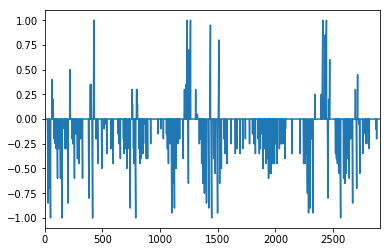

In [14]:
#pokazanie danych na wykresie .plot()
df['steering_angle'].plot()

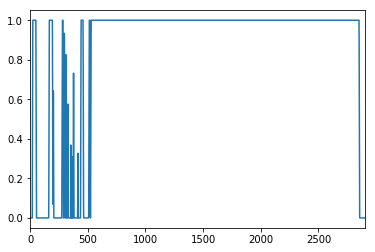

In [15]:
df['throttle'].plot()

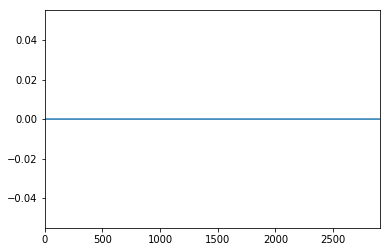

In [16]:
df['break'].plot()

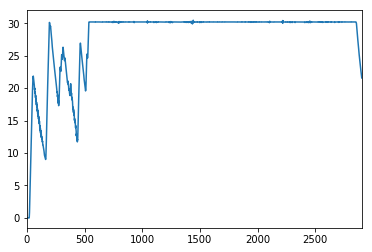

In [17]:
df['speed'].plot()

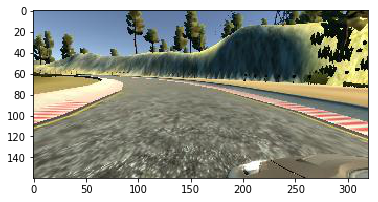

In [20]:
#wczytujemy przykładowy obraz, pierwszy obraz z kamery lewej, [0] zerowy, czyli pierwszy element
img = Image.open(df['left'][0])

#wyświetlamy
plt.imshow(img)

In [25]:
# konwertowanie obrazu do macierzy w numpy (taki format wykorzystywany do trenowania sieci neuronowych)
img = np.asarray(img)

# podgląd formatu macierzy (y = 160, x = 320, 3 wymiary, bo kolor, RGB)
img.shape

(160, 320, 3)

In [26]:
# definiowanie funkcji dla konwertowania obrazu:

# (1) ścieżka do pliku - zwraca (return) obraz jako macierz
def loadImage(fname):
    return np.asarray(Image.open(fname))

# (2) przetwarzanie obrazu i zmniejszenie jego rozmiaru
def process_image(img):
    return img[10:130:2, ::4, :]

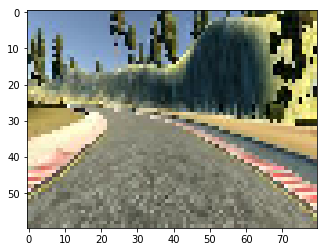

In [31]:
img = process_image(loadImage(df['left'][0]))
plt.imshow(img)

In [34]:
# przygotowanie tensorów danych:
# X - wejście do sieci neuronowych
# y - predykcja

# przygotowujemy tablicę na podstawie naszej tablicy ze ścieżkami do plików
# += dodajemy do listy kolejne elementy (żeby ich nie nadpisywać), listy się sumują
X = [process_image(loadImage(fname)) for fname in df['center']]
X += [process_image(loadImage(fname)) for fname in df['left']]
X += [process_image(loadImage(fname)) for fname in df['right']]

# konwertujemy kolumnę 'kąt' do macierzy
y = np.array(df['steering_angle'])

# konkatenacja listy, gromadzenie w jedną większą macierz, zamiast sumowania elementów
y = np.concatenate([y, y+0.4, y-0.4])

In [35]:
# konwertujemy jeszcze X na macierz
X = np.array(X)

# wyświetlamy tensory/macierze:
# liczba i wymiary zdjęć (X)
print(X.shape)

# liczba wartości dla kąta (steering angle)
print(y.shape)

(8712, 60, 80, 3)
(8712,)


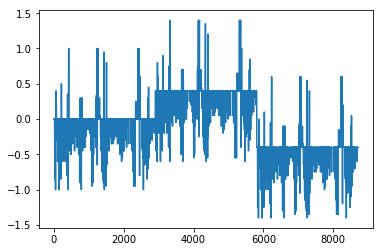

In [36]:
# wykres y po dodaniu wartości dla lewej i prawej kamery
plt.plot(y)
plt.show();

In [38]:
# zapisanie macierzy do pliku (zapisuje w formacie binarnym)
# parametry funkcji to plik (file) i macierz (arr)
np.save('X.npy', X)
np.save('y.npy', y)